In [3]:
# Die gegebenen Zahlen
zahlen = [1, 2, 3, 4, 5, 6, 9.87654321]

# Mittelwert berechnen
mittelwert = sum(zahlen) / len(zahlen)

# Ergebnis anzeigen
print(mittelwert)


4.410934744285714


In [2]:
import pandas as pd

# Lade die CSV-Datei aus deinem lokalen Verzeichnis
wetter = pd.read_csv('wetter.csv')

# Ausgabe der ersten paar Zeilen des Datensatzes
print(wetter.head())


        Datum  Bewoelkung  Temperatur  Windgeschwindigkeit  Wettercode
0  2012-01-01         8.0      9.8250                   14        58.0
1  2012-01-02         7.0      7.4375                   12         NaN
2  2012-01-03         8.0      5.5375                   18        63.0
3  2012-01-04         4.0      5.6875                   19        80.0
4  2012-01-05         6.0      5.3000                   23        80.0


In [3]:
durchschnittstemperatur = wetter['Temperatur'].mean()
print (durchschnittstemperatur)

12.099585595540177


In [4]:
import pandas as pd

# Umwandlung der 'Datum' Spalte in das Datumsformat
wetter['Datum'] = pd.to_datetime(wetter['Datum'])

# Den Monat aus der 'Datum' Spalte extrahieren
wetter['Monat'] = wetter['Datum'].dt.month

# Filtern der Daten für Juni (Monat == 6)
wetter_juni = wetter[wetter['Monat'] == 6]

# Durchschnittstemperatur im Juni berechnen
durchschnittstemperatur_juni = wetter_juni['Temperatur'].mean()

# Ausgabe des Ergebnisses
print(f"Die Durchschnittstemperatur im Juni beträgt: {durchschnittstemperatur_juni:.2f} °C")


Die Durchschnittstemperatur im Juni beträgt: 18.48 °C


In [5]:
import pandas as pd

# Angenommen, die Wetterdaten wurden bereits als DataFrame 'wetter' geladen und Datum umgewandelt

# Schritt 1: Den Monat aus der 'Datum' Spalte extrahieren, falls noch nicht geschehen
wetter['Datum'] = pd.to_datetime(wetter['Datum'])
wetter['Monat'] = wetter['Datum'].dt.month

# Schritt 2: Filtern der Daten für Mai (Monat 5) und Juli (Monat 7)
wetter_mai = wetter[wetter['Monat'] == 5]
wetter_juli = wetter[wetter['Monat'] == 7]

# Schritt 3: Berechnung der Durchschnittstemperaturen für Mai und Juli
durchschnitt_mai = wetter_mai['Temperatur'].mean()
durchschnitt_juli = wetter_juli['Temperatur'].mean()

# Ausgabe der Durchschnittstemperaturen
print(f"Durchschnittstemperatur im Mai: {durchschnitt_mai:.2f} °C")
print(f"Durchschnittstemperatur im Juli: {durchschnitt_juli:.2f} °C")

# Schritt 4: Durchführung des t-Tests, um zu überprüfen, ob der Unterschied signifikant ist
# Annahme: Wir testen auf einen zweiseitigen Test (ob die Temperaturen sich signifikant unterscheiden)

t_stat, p_value = stats.ttest_ind(wetter_mai['Temperatur'].dropna(), wetter_juli['Temperatur'].dropna())

# Ausgabe des t-Test-Ergebnisses
print(f"t-Statistik: {t_stat:.3f}")
print(f"p-Wert: {p_value:.3f}")

# Schritt 5: Interpretation des p-Werts
alpha = 0.05  # Signifikanzniveau
if p_value < alpha:
    print("Der Unterschied in den Durchschnittstemperaturen zwischen Mai und Juli ist signifikant.")
else:
    print("Der Unterschied in den Durchschnittstemperaturen zwischen Mai und Juli ist nicht signifikant.")


Durchschnittstemperatur im Mai: 15.24 °C
Durchschnittstemperatur im Juli: 20.75 °C


NameError: name 'stats' is not defined

In [6]:
import pandas as pd

# Lade die CSV-Datei aus deinem lokalen Verzeichnis
umsatz = pd.read_csv('umsatzdaten_gekuerzt.csv')

umsatz['Datum'] = pd.to_datetime(umsatz['Datum'])

# Ausgabe der ersten paar Zeilen des Datensatzes
print(umsatz.head())

       Datum  Warengruppe      Umsatz
0 2013-07-01            1  148.828353
1 2013-07-02            1  159.793757
2 2013-07-03            1  111.885594
3 2013-07-04            1  168.864941
4 2013-07-05            1  171.280754


In [7]:
import pandas as pd

# Lade die CSV-Datei aus deinem lokalen Verzeichnis
kiwo = pd.read_csv('kiwo.csv')

kiwo['Datum'] = pd.to_datetime(kiwo['Datum'])

# Ausgabe der ersten paar Zeilen des Datensatzes
print(kiwo.head())

       Datum  KielerWoche
0 2012-06-16            1
1 2012-06-17            1
2 2012-06-18            1
3 2012-06-19            1
4 2012-06-20            1


/tmp/ipykernel_2341/4162030954.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=durchschnitt_umsatz.index, y=durchschnitt_umsatz.values, palette='Blues_d')


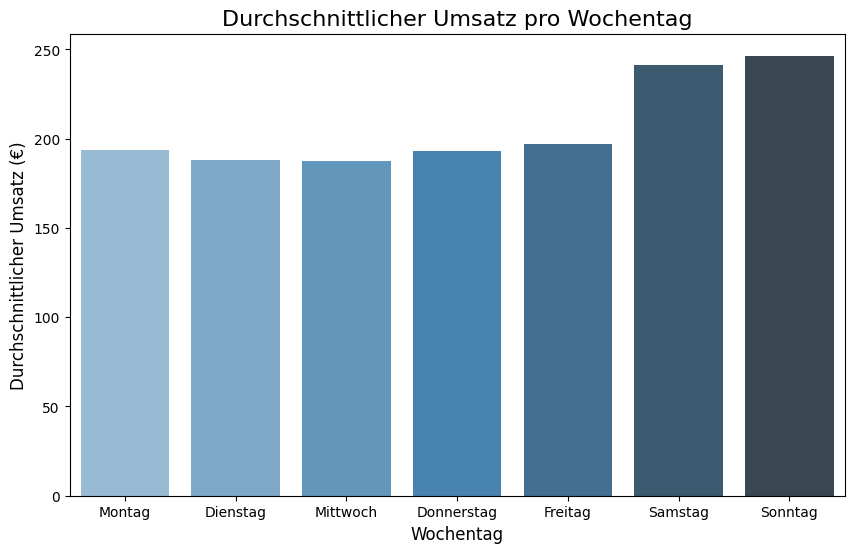

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Angenommen, der 'umsatz' DataFrame wurde bereits geladen

# Schritt 1: 'Datum' in das Datumsformat umwandeln
umsatz['Datum'] = pd.to_datetime(umsatz['Datum'])

# Schritt 2: Wochentag extrahieren (0 = Montag, 1 = Dienstag, ..., 6 = Sonntag)
umsatz['Wochentag'] = umsatz['Datum'].dt.weekday

# Schritt 3: Durchschnittlichen Umsatz pro Wochentag berechnen
durchschnitt_umsatz = umsatz.groupby('Wochentag')['Umsatz'].mean()

# Schritt 4: Wochentage als Namen hinzufügen, um das Diagramm leserlich zu machen
wochentage = ['Montag', 'Dienstag', 'Mittwoch', 'Donnerstag', 'Freitag', 'Samstag', 'Sonntag']
durchschnitt_umsatz.index = wochentage

# Schritt 5: Visualisierung des durchschnittlichen Umsatzes pro Wochentag
plt.figure(figsize=(10, 6))
sns.barplot(x=durchschnitt_umsatz.index, y=durchschnitt_umsatz.values, palette='Blues_d')

# Titel und Achsenbeschriftungen
plt.title('Durchschnittlicher Umsatz pro Wochentag', fontsize=16)
plt.xlabel('Wochentag', fontsize=12)
plt.ylabel('Durchschnittlicher Umsatz (€)', fontsize=12)

# Diagramm anzeigen
plt.show()


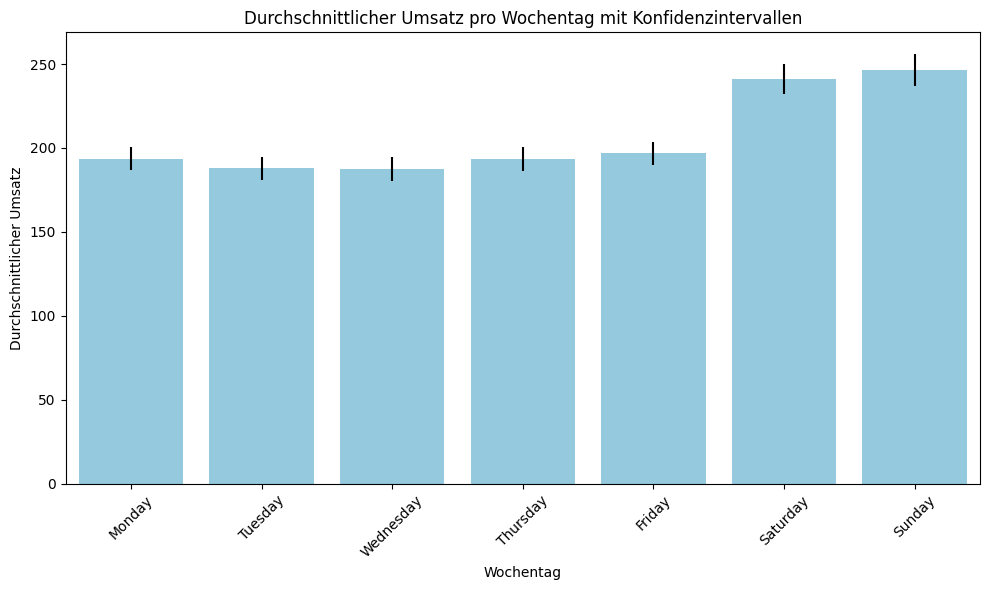

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Konvertiere die 'Datum'-Spalte in das Datumsformat
umsatz['Datum'] = pd.to_datetime(umsatz['Datum'])

# Füge die Wochentag-Spalte hinzu
umsatz['Wochentag'] = umsatz['Datum'].dt.day_name()

# Definiere die Wochentagsreihenfolge
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Berechne den durchschnittlichen Umsatz und das Konfidenzintervall pro Wochentag
umsatz_summary = umsatz.groupby('Wochentag')['Umsatz'].agg(['mean', 'std', 'count']).reindex(order)
umsatz_summary['sem'] = umsatz_summary['std'] / np.sqrt(umsatz_summary['count'])  # Standardfehler
umsatz_summary['ci'] = umsatz_summary['sem'] * stats.t.ppf((1 + 0.95) / 2, umsatz_summary['count'] - 1)  # 95% Konfidenzintervall

# Erstelle das Balkendiagramm mit einheitlicher Farbe
plt.figure(figsize=(10, 6))
sns.barplot(
    x=umsatz_summary.index,
    y=umsatz_summary['mean'],
    yerr=umsatz_summary['ci'],
    order=order,
    color='skyblue'  # Einheitliche Farbe für alle Balken
)
plt.xlabel('Wochentag')
plt.ylabel('Durchschnittlicher Umsatz')
plt.title('Durchschnittlicher Umsatz pro Wochentag mit Konfidenzintervallen')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




In [11]:
# Zuordnung von Warengruppen zu Kategorien
kategorie_mapping = {
    1: 'Brot',
    2: 'Broetchen',
    3: 'Croissant',
    4: 'Konditorei',
    5: 'Kuchen',
    6: 'Saisonbrot'
}

# Neue Spalte 'Kategorie' hinzufügen, basierend auf der Spalte 'Warengruppe'
umsatz['Kategorie'] = umsatz['Warengruppe'].map(kategorie_mapping)

# Überprüfen, ob die Zuordnung korrekt durchgeführt wurde
print(umsatz.head())


       Datum  Warengruppe      Umsatz  Wochentag Kategorie
0 2013-07-01            1  148.828353     Monday      Brot
1 2013-07-02            1  159.793757    Tuesday      Brot
2 2013-07-03            1  111.885594  Wednesday      Brot
3 2013-07-04            1  168.864941   Thursday      Brot
4 2013-07-05            1  171.280754     Friday      Brot


In [12]:
print(wetter.head())

       Datum  Bewoelkung  Temperatur  Windgeschwindigkeit  Wettercode  Monat
0 2012-01-01         8.0      9.8250                   14        58.0      1
1 2012-01-02         7.0      7.4375                   12         NaN      1
2 2012-01-03         8.0      5.5375                   18        63.0      1
3 2012-01-04         4.0      5.6875                   19        80.0      1
4 2012-01-05         6.0      5.3000                   23        80.0      1


In [13]:
import pandas as pd

# CSV-Datei mit Wettercodes und deren Beschreibung einlesen
wettercodes_df = pd.read_csv('wettercodes.csv')  # Datei anpassen

# Erstelle ein Dictionary für das Mapping
wettercode_mapping = dict(zip(wettercodes_df['Wettercode'], wettercodes_df['Beschreibung']))

# Neue Spalte 'Wetterbedingungen' hinzufügen, basierend auf dem Mapping
wetter['Wetterbedingungen'] = wetter['Wettercode'].map(wettercode_mapping)

# Ausgabe überprüfen
print(wetter.head())


       Datum  Bewoelkung  Temperatur  Windgeschwindigkeit  Wettercode  Monat  \
0 2012-01-01         8.0      9.8250                   14        58.0      1   
1 2012-01-02         7.0      7.4375                   12         NaN      1   
2 2012-01-03         8.0      5.5375                   18        63.0      1   
3 2012-01-04         4.0      5.6875                   19        80.0      1   
4 2012-01-05         6.0      5.3000                   23        80.0      1   

                                  Wetterbedingungen  
0          Leichter Spruehregen mit Regen vermischt  
1                                               NaN  
2  Durchgehender maessiger nicht gefrierender Regen  
3                             Leichter Regenschauer  
4                             Leichter Regenschauer  


In [14]:
# Importiere pandas
import pandas as pd

# Speichern als CSV-Datei
wetter.to_csv('wetter.csv', index=False)


In [15]:
# Laden der CSV-Datei
wetter = pd.read_csv('wetter.csv')


In [7]:
import pandas as pd
import statsmodels.formula.api as smf

umsatz_gesamt = pd.read_csv('umsatz_gesamt.csv', sep=';')


# Fit the linear model
mod = smf.ols('Umsatz ~ Temperatur', data=umsatz_gesamt).fit()
# Print the summary
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     487.2
Date:                Thu, 28 Nov 2024   Prob (F-statistic):          2.77e-105
Time:                        16:19:08   Log-Likelihood:                -59330.
No. Observations:                9318   AIC:                         1.187e+05
Df Residuals:                    9316   BIC:                         1.187e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    153.1775      2.834     54.055      0.0

In [8]:
import pandas as pd
import statsmodels.formula.api as smf

# Daten einlesen
umsatz_gesamt = pd.read_csv('umsatz_gesamt.csv', sep=';')

# Temperatur in 5 Bins einteilen
umsatz_gesamt['Temp_Bin'] = pd.cut(umsatz_gesamt['Temperatur'], bins=5, labels=False)

# Fit des linearen Modells mit den Temperatur-Bins
mod = smf.ols('Umsatz ~ Temp_Bin', data=umsatz_gesamt).fit()

# Ergebnis der Regression ausgeben
print(mod.summary())


                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     452.7
Date:                Thu, 28 Nov 2024   Prob (F-statistic):           3.94e-98
Time:                        16:22:24   Log-Likelihood:                -59347.
No. Observations:                9318   AIC:                         1.187e+05
Df Residuals:                    9316   BIC:                         1.187e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    138.5781      3.524     39.329      0.0